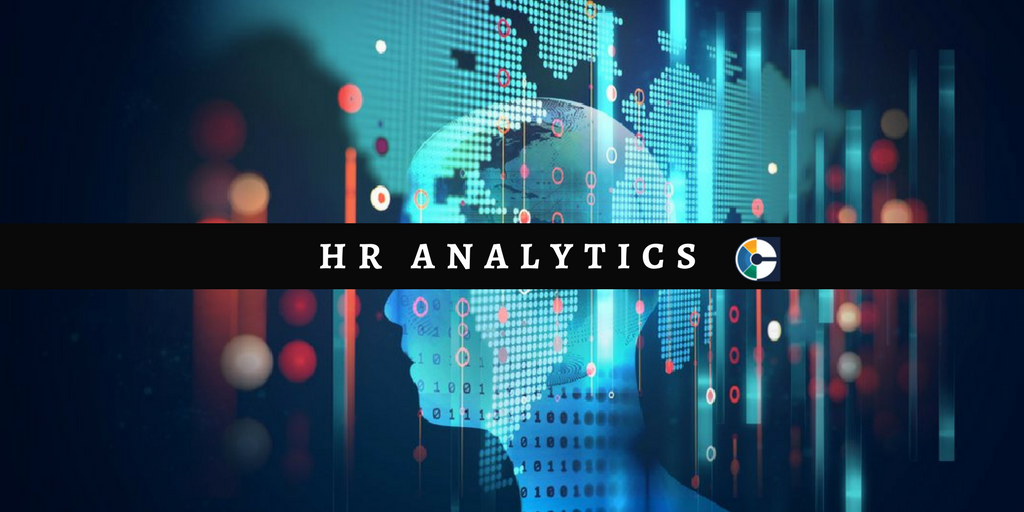

<center><h1 style = "text-shadow: 8px 8px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold" >📜 Introduction</h1></center>
<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.</p>

<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">What we will do, We will examine our data, we will look at individual features, we will visualize them.We will look at the effects of the features on the target.The data is very complex and there are a lot of null data we will try to eliminate them.Finally, we will create our models. </p>
    

<h2 style = "text-shadow: 8px 8px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold">📋 Content :</h2>

<ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold"> Load and Check Data </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold"> Variable Description </a> </li>   
    <li style = "color:darkgray;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold"> Basic Data Analysis </a> </li>           
        <li style = "color:darkgray;font-size:15px"> <a href = "#4" style = "color:black;font-weight:bold"> Missing Value </a> <ul> <li style = "color:lightgray"><a href = "#5" style = "color:black;font-weight:500"> Find Missing Value  </a> </li> <li style = "color:lightgray"><a href = "#6" style = "color:black;font-weight:500"> Fill Missing Value  </a> </li> </ul>
                <li style = "color:darkgray;font-size:15px"> <a href = "#7" style = "color:black;font-weight:bold"> Feature Engineering </a> </li>        
       <li style = "color:darkgray;font-size:15px"> <a href = "#8" style = "color:black;font-weight:bold"> Modeling   </a> <ul> <li style = "color:lightgray"><a href = "#9" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> Train - Test Split  </a></li> <li style = "color:lightgray"><a href = "#10" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> <strong>1.</strong> XGBoost Model </a></li> <li style = "color:lightgray"><a href = "#11" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> <strong>2.</strong> RandomForest Model </a></li> <li style = "color:lightgray"><a href = "#12" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> <strong>3.</strong> CatBoost Model </a></li> <li style = "color:lightgray"><a href = "#13" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> <strong>4.</strong> KNN Model </a></li> <li style = "color:lightgray"><a href = "#14" style = "background:white;color:#1E90FF;border:0;border-radius:3px;font-family:Impact;font-size:14px"> <strong>5.</strong> SVM Model </a></li> </ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#15" style = "color:black;font-weight:bold"> Model Result </a> </ul> 

<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 📖 Import Library &#34;</h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm, skew, boxcox
from sklearn.preprocessing import RobustScaler, StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings # don't show warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; ✔️ Load and Check Data &#34; </h2> 

In [ ]:
train_data = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
test_data = pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv")
enrollee_id = test_data["enrollee_id"]

In [ ]:
print(" \t Data Columns : \n \n ",train_data.columns)

In [ ]:
train_data.head()

<ul>
    <li style = "color:red" > <p style = "font-family:Comic Sans MS;color:black;font-weight:500">Even when we look at the first 5 rows of your data, we see that there is a lot of missing data.</p> </li>
</ul>

In [ ]:
train_data.describe()

<a id = "2"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 📝 Variable Description &#34; </h2>


<ol>    
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> enrollee_id : </strong> Unique ID for enrollee </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> city : </strong> City code </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> city_development_index : </strong> Developement index of the city (scaled) </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> gender : </strong> Registered person gender (M/F) </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> relevent_experience : </strong> Relevent experience </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> enrolled_university  : </strong> Type of university of the enrolee </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> education_level : </strong> edu level </p> </li>  
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> major_discipline : </strong> edu discipline of enrollee </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> experience : </strong>Total experience in years </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> company_size : </strong> No of employees in current employer's company </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> company_type : </strong> Type of current employer </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> last_new_job : </strong> Difference in years between previous job and current job </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> training_hours : </strong> training hours completed </p> </li>
    <li style = "color:#004D40;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> target : </strong> 0 – Not looking for job change, 1 – Looking for a job change </p> </li>
</ol>

In [ ]:
print("Train Data INFO \n")
train_data.info()

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> Here we will examine and interpret all our features one by one. </p>  </li>
</ul>

In [ ]:
#city
print("{} \n".format(train_data["city"].value_counts()))
print("null value number -- > {} \n".format(train_data["city"].isnull().sum()))

In [ ]:
#city_development_index
plt.figure(figsize=(9,3))
plt.hist(train_data["city_development_index"], color="purple")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(train_data["city_development_index"].value_counts()))
print("null value number -- > {} \n".format(train_data["city_development_index"].isnull().sum()))

In [ ]:
#gender 
gender = train_data["gender"].value_counts()
plt.figure(figsize=(9,3))
sns.countplot(train_data["gender"], hue = "target", data = train_data)
plt.title("gender", color = "darkred")
plt.show()
print(gender)
print("null value number -- > {} \n".format(train_data["gender"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> here we see that the number of men is higher than the others. </p>  </li>
        <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> Also, we see that there are too many nulls. We will try to fix this in the future. </p>  </li>
</ul>

In [ ]:
#relevent_experience
experience = train_data["relevent_experience"].value_counts()
data_index = experience.index
data_values = experience.values

plt.figure(figsize = (6,8))
plt.pie(data_values, labels=data_index, autopct='%1.2f%%')
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

print(experience)
print("null value number -- > {} \n".format(train_data["relevent_experience"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We see that there are more people with relevant experience. </p>  </li>
</ul>

In [ ]:
#enrolled_university 
university = train_data["enrolled_university"].value_counts()

ax= sns.barplot(x=university.index, y=university.values)
plt.xlabel(' Type of university of the enrolee', size = 15, color = "green") 
plt.ylabel('Value', size = 15) 
plt.title('Enrolled University', color = "darkred")
plt.show()

print(university)
print("null value number -- > {} \n".format(train_data["enrolled_university"].isnull().sum()))

In [ ]:
#education_level
colors = ['#558B2F','#E65100','#FFE4E1','#A52A2A','black']
edu_level = train_data["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.barplot(x=edu_level.index, y=edu_level.values)
plt.xlabel('Edu Level', size = 15, color = "green") 
plt.xticks(rotation = 120)
plt.ylabel('Value', size = 15) 
plt.title('Edu Level', color = "darkred")

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Edu Level")
plt.legend()
plt.show()


print(edu_level)
print("null value number -- > {} \n".format(train_data["education_level"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We see the distribution of the education level feature within the data. It consists mostly of graduates. </p>  </li>
</ul>

In [ ]:
# major_discipline
mj_discipline = train_data["major_discipline"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(train_data["major_discipline"])
plt.title("major discipline", color = "darkred")
plt.show()

print(mj_discipline)
print("null value number -- > {} \n".format(train_data["major_discipline"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We see that the number of STEMs is quite high compared to others. When creating our model, it may override others. </p>  </li>
</ul>

In [ ]:
#experience 
print("{} \n".format(train_data["experience"].value_counts()))
print("null value number -- > {} \n".format(train_data["experience"].isnull().sum()))

In [ ]:
#company_size
company_size = train_data["company_size"].value_counts()

ax= sns.barplot(x=company_size.index, y=company_size.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.title('company_size', color = "darkred")
plt.show()

print(company_size)
print("null value number -- > {} \n".format(train_data["company_size"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> Here, too, we see that we have a lot of null data, but in general the distribution is not very different. </p>  </li>
</ul>

In [ ]:
#company_type
company_type = train_data["company_type"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(train_data["company_type"], hue = "target", data = train_data)
plt.xticks(rotation = 50)
plt.title("company type", color = "darkred")
plt.show()

print(company_type)
print("null value number -- > {} \n".format(train_data["company_type"].isnull().sum()))


In [ ]:
# last_new_job 
last_new = train_data["last_new_job"].value_counts()

ax= sns.barplot(x=last_new.index, y=last_new.values)
plt.ylabel('Value', size = 15) 
plt.xticks(rotation = 50)
plt.title('last-new job', color = "darkred")
plt.show()

print(last_new)
print("null value number -- > {} \n".format(train_data["last_new_job"].isnull().sum()))

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> the difference with her old job is usually 1 year. </p>  </li>
</ul>

In [ ]:
#training_hours 
plt.figure(figsize=(9,3))
plt.hist(train_data["training_hours"], color="lightblue")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(train_data["training_hours"].value_counts()))
print("null value number -- > {} \n".format(train_data["training_hours"].isnull().sum()))

<a id = "3"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 🔍 Basic Data Analysis &#34; </h2>

In [ ]:
# last_new_job - target
train_data[["last_new_job","target"]].groupby(["last_new_job"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
# company_type -target
train_data[["company_type","target"]].groupby(
    ["company_type"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
# gender -target
train_data[["gender","target"]].groupby(
    ["gender"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
#relevent_experience -target
train_data[["relevent_experience","target"]].groupby(
    ["relevent_experience"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
#enrolled_university -target
train_data[["enrolled_university","target"]].groupby(
    ["enrolled_university"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
#education_level -target
train_data[["education_level","target"]].groupby(
    ["education_level"], as_index = False).mean().sort_values(by = "target",ascending = False)

In [ ]:
#major_discipline
train_data[["major_discipline","target"]].groupby(
    ["major_discipline"], as_index = False).mean().sort_values(by = "target",ascending = False)


<a id = "4"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 🕵️‍ Missing Value &#34; </h2>

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We will detect our null values ​​and try to eliminate them. </p>  </li>
</ul>

<a id = "5"></a>
<h4 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34;  Find Missing Value &#34; </h4>

In [ ]:
train_data_len = len(train_data)
train_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [ ]:
train_data.head()

In [ ]:
print(" \t Columns with null \n -->",train_data.columns[train_data.isnull().any()])

In [ ]:
print("\t how many nulls are there \n \n ",train_data.isnull().sum())

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We see that there are many nulls in our properties.If we do not fix them, it will affect our model badly. </p>  </li>
</ul>

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [ ]:
train_missing= missing_values_table(train_data)
train_missing

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> Let's take a look at this. our missing data and their percentages. </p>  </li>
</ul>

In [ ]:
msno.bar(train_data, color = "red")

In [ ]:
msno.matrix(train_data)

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> By looking at the graphs above, we can see where our null data is. </p>  </li>
</ul>

In [ ]:
msno.heatmap(train_data)

In [ ]:
msno.dendrogram(train_data)

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We are looking at the interrelationships of the properties. We can take advantage of these when filling in null values. </p>  </li>
</ul>

<a id = "6"></a>
<h4 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; Fill Missing Value &#34; </h4>

In [ ]:
train_data.dropna(subset=["experience"], inplace=True)
train_data.dropna(subset=["enrolled_university"], inplace=True)
train_data.dropna(subset=["last_new_job"], inplace=True)
train_data.dropna(subset=["education_level"], inplace=True)

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We can delete data that is too little in your blank data to be ignored. </p>  </li>
</ul>

In [ ]:
train_missing1= missing_values_table(train_data)
train_missing1

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> When we take a look at our table again, we see that our null data is decreasing. </p>  </li>
</ul>

In [ ]:
print("NULL experience --> ",train_data["experience"].isnull().sum())
print("NULL enrolled_university --> ",train_data["enrolled_university"].isnull().sum())
print("NULL last_new_job --> ",train_data["last_new_job"].isnull().sum())
print("NULL education_level --> ",train_data["education_level"].isnull().sum())
                        

In [ ]:
#major_discipline
print("most repetitive --> ",train_data["major_discipline"].value_counts().index[0])
train_data["major_discipline"].fillna( method ='ffill', limit = 3, inplace = True)

In [ ]:
train_data.dropna(subset=["major_discipline"], inplace=True)
print("NULL major_discipline --> ",train_data["major_discipline"].isnull().sum())

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> After removing our main discipline nulls, we see that there are 3 nulls left.We take them out of our data. </p>  </li>
</ul>

In [ ]:
#company_size
train_data["company_size"].fillna( method ='ffill', limit = 2, inplace = True)

In [ ]:
train_data.dropna(subset=["company_size"], inplace=True)
print("NULL company_size --> ",train_data["company_size"].isnull().sum())

In [ ]:
#company_type
train_data["company_type"].fillna( method ='ffill', limit = 2, inplace = True)

In [ ]:
train_data.dropna(subset=["company_type"], inplace=True)
print("NULL company_type --> ",train_data["company_type"].isnull().sum())

In [ ]:
#gender
train_data["gender"].fillna( method ='ffill', limit = 2, inplace = True)

In [ ]:
train_data.dropna(subset=["gender"], inplace=True)
print("NULL gender --> ",train_data["gender"].isnull().sum())

<a id = "7"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 💻 Feature Engineering &#34; </h2>

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> columns that we have examined and visualized above. We will make it more understandable for our model. </p>  </li>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We will look at its effects on the target and make groupings accordingly. </p>  </li>
</ul>

In [ ]:
#gender
# male = 0 , female = 1, other = 2
train_data["gender"] = [ 0 if gender == "Male"
                        else 1 if gender == "Female"
                        else 2 for gender in train_data["gender"]]

In [ ]:
sns.countplot(x="gender", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "gender", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(["Male","Female","Other"])
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#relevent_experience
# Has relevent experience = 0 , No relevent experience = 1
train_data["relevent_experience"] = [ 0 if i == "Has relevent experience"
                                    else 1 for i in train_data["relevent_experience"]]


In [ ]:
sns.countplot(x="relevent_experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "relevent_experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#enrolled_university 
# no_enrollment = 0 , Full time course = 1, Part time course = 2

train_data["enrolled_university"] = [ 0 if i == "no_enrollment"
                                    else 1 if i == "Full time course"
                                    else 2 for i in train_data["enrolled_university"]]

In [ ]:
sns.countplot(x="enrolled_university", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "enrolled_university", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#education_level
# Graduate = 0 , Masters = 1, High School = 2, Phd = 3, Primary School = 4 

train_data["education_level"] = [ 0 if i == "Graduate"
                                    else 1 if i == "Masters"
                                    else 2 if i == "High School"
                                    else 3 if i == "Phd" 
                                    else 4 for i in train_data["education_level"]]

In [ ]:
sns.countplot(x="education_level", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "education_level", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#major_discipline 
# STEM  = 0 , Humanities = 1, Business Degree = 2, Arts = 3, No Major = 4, Other = 5 

train_data["major_discipline"] = [ 0 if i == "STEM"
                                    else 1 if i == "Humanities"
                                    else 2 if i == "Business Degree"
                                    else 3 if i == "Arts" 
                                    else 4 if i == "No Major" 
                                    else 5 for i in train_data["major_discipline"]]

In [ ]:
sns.countplot(x="major_discipline", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "major_discipline", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#experience
train_data["experience"] = [ 0 if i == "2" or i == "1" or i == "4" or i == "<1" or i == "3"
                                    else 1 if i == "5>" or i == "11" or i == "7" or i == "10" or i == "6" or i == "9" or i == "8" or i == "20"
                                    else 2 for i in train_data["experience"]]

In [ ]:
#experience
sns.countplot(x="experience", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "experience", y = "target", data = train_data, kind = "bar")
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#company_size
train_data["company_size"] = [ 0 if i == "10/49"
                                    else 1 for i in train_data["company_size"]]

In [ ]:
sns.countplot(x="company_size", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "company_size", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [ ]:
#company_type
# pvt ltd = 0, Funded Startup  = 1 , Public Sector  = 2, Early Stage Startup = 3, NGO = 4 , else 5 

train_data["company_type"] = [ 0 if i == "Pvt Ltd"
                               else 1 if i == "Funded Startup"
                               else 2 if i == "Public Sector"
                               else 3 if i == "Early Stage Startup"
                               else 4 if i == "NGO" 
                               else 5 for i in train_data["company_type"]]

In [ ]:
sns.countplot(x="company_type", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "company_type", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [ ]:
train_data["company_type"].value_counts()

In [ ]:
train_data["company_type"] = [ 0 if i == 3 or i == 4
                               else 1 if i == 2
                               else 2 for i in train_data["company_type"]]

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> Here again, we make an arrangement, we make it simpler. </p>  </li>
</ul>

In [ ]:
#last_new_job
train_data["last_new_job"] = [ 0 if i == "1"
                               else 1 if i == "2"
                               else 2 if i == "3"
                               else 3 if i == "4"
                               else 4 if i == "never" 
                               else 5 for i in train_data["last_new_job"]]

In [ ]:
sns.countplot(x="last_new_job", data = train_data)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
g = sns.factorplot(x = "last_new_job", y = "target", data = train_data, kind = "bar")
g.set_xticklabels(rotation = 90)
g.set_ylabels("TARGET")
plt.show()

In [ ]:
train_data["last_new_job"] = [ 0 if i == 4
                               else 1 if i == 5
                               else 2 for i in train_data["last_new_job"]]

In [ ]:
train_data.head()

In [ ]:
#city
le = LabelEncoder()
train_data["city"] = le.fit_transform(train_data["city"])

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> We do it categorical using the city feature and the labelencoder. </p>  </li>
</ul>

In [ ]:
# training_hours
sns.distplot(train_data["training_hours"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["training_hours"])
print("mu {} : {}, sigma {} : {}".format("training_hours", mu, "training_hours", sigma))
print()

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> we see that there is a tail to the right from here. we need to fix this. we do it here. </p>  </li>
</ul>

In [ ]:
train_data["training_hours"], lam = boxcox(train_data["training_hours"])

In [ ]:
# city_development_index
sns.distplot(train_data["city_development_index"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(train_data["city_development_index"])
print("mu {} : {}, sigma {} : {}".format("city_development_index", mu, "city_development_index", sigma))
print()

In [ ]:
train_data["city_development_index"], lam = boxcox(train_data["city_development_index"])

<a id = "8"></a>
<h2 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 📁 Modeling &#34; </h2>

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"><strong>1.</strong> XGBoost Model </p>  </li>
        <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> <strong>2.</strong> RandomForest Model </p>  </li>
        <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> <strong>3.</strong> CatBoost Model </p>  </li>
        <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> <strong>4.</strong>KNN Model </p>  </li>
        <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:500"> <strong>5.</strong>SVM Model </p>  </li>
</ul>

In [ ]:
train_data = train_data.reset_index(drop=True)

In [ ]:
test = train_data[17248:]
test.drop(labels = ["target","enrollee_id"],axis = 1, inplace = True)

In [ ]:
test.head()

In [ ]:
train = train_data[:17248]
train.drop(labels = ["enrollee_id"],axis = 1, inplace = True)

In [ ]:
train.head()

In [ ]:
X = train.drop(labels = "target", axis = 1)
y = train["target"]

<a id = "9"></a>
<h4 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 📊 Train - Test Split &#34; </h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

In [ ]:
# model accuracy
result = []

<a id = "10"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; <strong>1.</strong> XGBoost model &#34; </h3>

In [ ]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)

<a id = "11"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; <strong>2.</strong> Random Forest Model &#34; </h3>

In [ ]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)


<a id = "12"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; <strong>3.</strong> CatBoost Model &#34; </h3>

In [ ]:
best_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

model_cat_boost = CatBoostClassifier(
        **best_params,
        loss_function='Logloss',
        eval_metric='Accuracy',         
        nan_mode='Min',
        verbose=False
    )

model_cat_boost.fit(
        X_train, y_train,
        verbose_eval=100, 
        early_stopping_rounds=50,
        eval_set=(X_test, y_test),
        use_best_model=False,
        plot=True
)

y_pred_cat_boost = model_cat_boost.predict(X_test)

cm_cat_boost = confusion_matrix(y_pred_cat_boost, y_test)
acc_cat_boost = accuracy_score(y_test, y_pred_cat_boost)
result.append(acc_cat_boost)
print("RESULT")
print("Cat Boost Model Acc : ",acc_cat_boost)

<a id = "13"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; <strong>4.</strong> KNN Model &#34; </h3>

In [ ]:
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train,y_train)
y_pred_knn = clf.predict(X_test)
cm_random_knn = confusion_matrix(y_pred_knn, y_test)
acc_random_knn = accuracy_score(y_test, y_pred_knn)
result.append(acc_random_knn)
print("RESULT")
print("KNN Model Acc : ",acc_random_knn)

<a id = "14"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; <strong>5.</strong> SVM Model &#34; </h3>

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
result.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)

<a id = "15"></a>
<h3 style = "text-shadow: 6px 6px 4px #333;font-family:Comic Sans MS;color:black;text-decoration: underline;font-weight:bold"> &#34; 📈 Model Result &#34; </h3>

In [ ]:
results = pd.DataFrame({"Model Result":result, 
                        "Models":["XGBoost",
                                  "RandomForest",
                                  "CatBoost Model ",
                                  "KNN", 
                                  "SVM"]})

In [ ]:
results

In [ ]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

<ul>
    <li style = "color:red"> <p style = "font-family:Comic Sans MS;color:black;font-weight:bold"> yes, we have come to the end of this study. I am waiting for your nice wishes and advice. </p>  </li>
</ul>